In [1]:
import glob
import os
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import pickle
import warnings
warnings.filterwarnings("ignore")
import cv2

In [2]:
path = "myData"

myList = os.listdir(path)
noOfClasses = len(myList)

print("Label(sınıf) Sayısı", noOfClasses)


Label(sınıf) Sayısı 3


In [3]:
images = []
classNo = []

for i in range(noOfClasses):
    myImageList = os.listdir(path + "\\"+str(i))
    for j in myImageList:
        img = cv2.imread(path + "\\"+str(i)+"\\"+j)
        img = cv2.resize(img,(32,32))
        images.append(img)
        classNo.append(i)
        
print(len(images))
print(len(classNo))

1598
1598


In [4]:
images = np.array(images)
classNo = np.array(classNo)

print(images.shape)

(1598, 32, 32, 3)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(images,classNo,test_size = 0.5, random_state = 42)
x_train, x_validation, y_train, y_validation = train_test_split(x_train,y_train,test_size = 0.2, random_state = 42)

print(images.shape)
print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)

(1598, 32, 32, 3)
(639, 32, 32, 3)
(799, 32, 32, 3)
(160, 32, 32, 3)


Text(0.5, 1.0, 'y_validation')

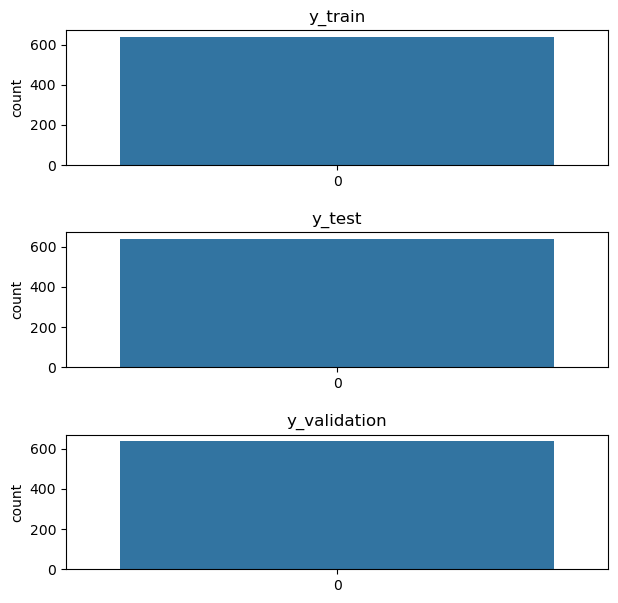

In [6]:
fig, axes = plt.subplots(3,1,figsize=(7,7))
fig.subplots_adjust(hspace = 0.5)
sns.countplot(y_train,ax=axes[0])
axes[0].set_title("y_train")

sns.countplot(y_train,ax=axes[1])
axes[1].set_title("y_test")

sns.countplot(y_train,ax=axes[2])
axes[2].set_title("y_validation")

In [7]:
def preProcess(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img / 255
    
    return img

x_train = np.array(list(map(preProcess, x_train)))
x_test = np.array(list(map(preProcess,x_test)))
x_validation = np.array(list(map(preProcess,x_validation)))
x_train = x_train.reshape(-1,32,32,1)
print(x_train.shape)
x_test = x_test.reshape(-1,32,32,1)
x_validation = x_validation.reshape(-1,32,32,1)

(639, 32, 32, 1)


In [8]:
dataGen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range= 0.1,
                            rotation_range= 10)

dataGen.fit(x_train)

y_train = to_categorical(y_train,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)

model = Sequential()
model.add(Conv2D(input_shape = (32,32,1), filters = 8, kernel_size = (5,5),activation = "relu", padding = "same" ))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 8, kernel_size = (3,3),activation = "relu", padding = "same" ))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = noOfClasses, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer=("Adam"), metrics = ["accuracy"])

batch_size = 250

hist = model.fit_generator(dataGen.flow(x_train, y_train, batch_size = batch_size),
                                      validation_data = (x_validation, y_validation),
                                      epochs = 15, steps_per_epoch = x_train.shape[0]//batch_size, shuffle = 5)

Epoch 1/15
2/2 [==============================] - 3s 762ms/step - loss: 1.1112 - accuracy: 0.4120 - val_loss: 0.7742 - val_accuracy: 0.8500
Epoch 2/15
2/2 [==============================] - 0s 233ms/step - loss: 0.7353 - accuracy: 0.8638 - val_loss: 0.5762 - val_accuracy: 0.8500
Epoch 3/15
2/2 [==============================] - 1s 311ms/step - loss: 0.5083 - accuracy: 0.8680 - val_loss: 0.6296 - val_accuracy: 0.8500
Epoch 4/15
2/2 [==============================] - 1s 306ms/step - loss: 0.5742 - accuracy: 0.8580 - val_loss: 0.7065 - val_accuracy: 0.8500
Epoch 5/15
2/2 [==============================] - 1s 330ms/step - loss: 0.5602 - accuracy: 0.8680 - val_loss: 0.6820 - val_accuracy: 0.8500
Epoch 6/15
2/2 [==============================] - 1s 213ms/step - loss: 0.5068 - accuracy: 0.8766 - val_loss: 0.6234 - val_accuracy: 0.8500
Epoch 7/15
2/2 [==============================] - 1s 275ms/step - loss: 0.5168 - accuracy: 0.8680 - val_loss: 0.5722 - val_accuracy: 0.8500
Epoch 8/15
2/2 [====

In [10]:

model.save(f"../models/dataset")


INFO:tensorflow:Assets written to: ../models/dataset\assets


INFO:tensorflow:Assets written to: ../models/dataset\assets
